In [3]:
import os
import numpy as np
from PIL import Image
import random
from matplotlib import pyplot as plt
from tensorflow import keras

In [ ]:
#이미지 업로드해서 말/사람 예측
class DataReader():
    def __init__(self):
        self.label = ["horse", "human"]

        self.train_X = []
        self.train_Y = []
        self.test_X = []
        self.test_Y = []

        self.read_images()

    def read_images(self):
        data = []
        # root = os.path.dirname(os.path.abspath(__file__))
        root=os.path.abspath(os.getcwd())
        root = "/content/sample_data"  # sample_data 내에서 데이터 로드
        print("Reading Data...")
        classes = ["horse", "human"]
        for i, cls in enumerate(classes):
            print("Opening " + cls + "/")
            for el in os.listdir(root + "/" + cls):
                img = Image.open(root + "/" + cls + "/" + el)
                data.append((np.asarray(img), i))
                img.close()

        random.shuffle(data)

        for i in range(len(data)):
            if i < 0.8*len(data):
                self.train_X.append(data[i][0])
                self.train_Y.append(data[i][1])
            else:
                self.test_X.append(data[i][0])
                self.test_Y.append(data[i][1])

        self.train_X = np.asarray(self.train_X) / 255.0
        self.train_Y = np.asarray(self.train_Y)
        self.test_X = np.asarray(self.test_X) / 255.0
        self.test_Y = np.asarray(self.test_Y)

        # 데이터 읽기가 완료되었습니다.
        # 읽어온 데이터의 정보를 출력합니다.
        print("\n\nData Read Done!")
        print("Training X Size : " + str(self.train_X.shape))
        print("Training Y Size : " + str(self.train_Y.shape))
        print("Test X Size : " + str(self.test_X.shape))
        print("Test Y Size : " + str(self.test_Y.shape) + '\n\n')

    def show_processed_images(self):
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.train_X[i], cmap=plt.cm.binary)
            plt.xlabel(self.label[int(self.train_Y[i])])
        plt.show()


def draw_graph(history):
    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")

    train_history = history.history["accuracy"]
    validation_history = history.history["val_accuracy"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Accuracy History")
    plt.xlabel("EPOCH")
    plt.ylabel("Accuracy")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("accuracy_history.png")

Reading Data...
Opening horse/
Opening human/


Data Read Done!
Training X Size : (822, 150, 150, 3)
Training Y Size : (822,)
Test X Size : (205, 150, 150, 3)
Test Y Size : (205,)




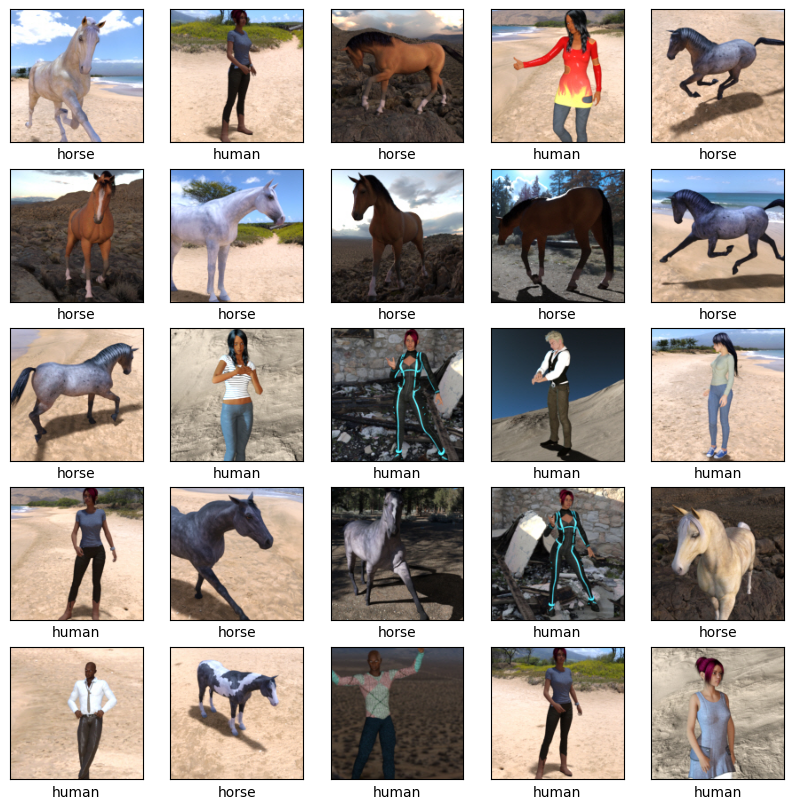



************ TRAINING START ************ 
Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 27s 872ms/step - accuracy: 0.6045 - loss: 0.7981 - val_accuracy: 0.7610 - val_loss: 0.4830
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 36s 704ms/step - accuracy: 0.8012 - loss: 0.4379 - val_accuracy: 0.9268 - val_loss: 0.3427
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 716ms/step - accuracy: 0.9276 - loss: 0.3970 - val_accuracy: 0.9707 - val_loss: 0.2695
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 666ms/step - accuracy: 0.9645 - loss: 0.1588 - val_accuracy: 0.9756 - val_loss: 0.0522
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 660ms/step - accuracy: 0.9794 - loss: 0.2238 - val_accuracy: 0.9707 - val_loss: 0.1256
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 645ms/step - accuracy: 0.9265 - loss: 0.4388 - val_accuracy: 0.8585 - val_loss: 0.4246
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 647ms/step - accuracy: 0.8543 - loss: 0.5518 - val_accuracy: 0.7317 - val_loss: 0.8118
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 641ms/step 

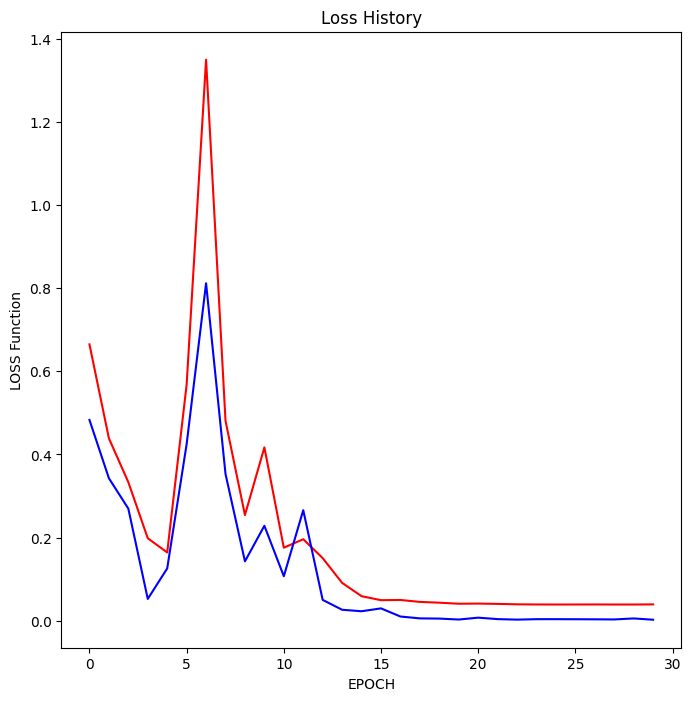

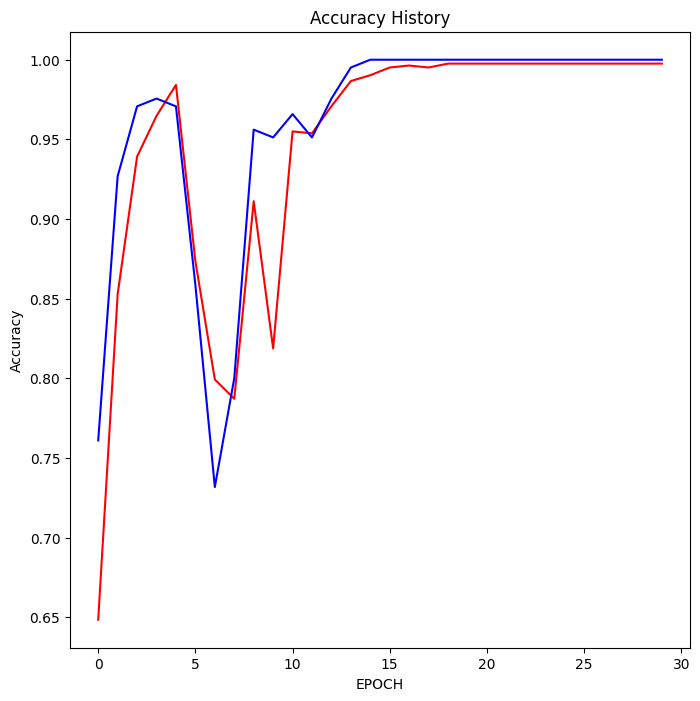

In [ ]:
dr = DataReader()
dr.show_processed_images()
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', metrics=['accuracy'],
              loss='binary_crossentropy')  #이진분류

print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=30,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

draw_graph(history)

In [4]:

class DataReader():
    def __init__(self):
        self.label = ["rock", "scissors","paper"]

        self.train_X = []
        self.train_Y = []
        self.test_X = []
        self.test_Y = []

        self.read_images()

    def read_images(self):
        data = []
        # root = os.path.dirname(os.path.abspath(__file__))
        root=os.path.abspath(os.getcwd())
        root = "/content/sample_data"  # sample_data 내에서 데이터 로드
        print("Reading Data...")
        classes = ["rock", "scissors","paper"]
        for i, cls in enumerate(classes):
            print("Opening " + cls + "/")
            for el in os.listdir(root + "/" + cls):
                img = Image.open(root + "/" + cls + "/" + el)
                data.append((np.asarray(img), i))
                img.close()

        random.shuffle(data)

        for i in range(len(data)):
            if i < 0.8*len(data):
                self.train_X.append(data[i][0])
                self.train_Y.append(data[i][1])
            else:
                self.test_X.append(data[i][0])
                self.test_Y.append(data[i][1])

        self.train_X = np.asarray(self.train_X) / 255.0
        self.train_Y = np.asarray(self.train_Y)
        self.test_X = np.asarray(self.test_X) / 255.0
        self.test_Y = np.asarray(self.test_Y)


        # 읽어온 데이터의 정보를 출력합니다.
        print("\n\nData Read Done!")
        print("Training X Size : " + str(self.train_X.shape))
        print("Training Y Size : " + str(self.train_Y.shape))
        print("Test X Size : " + str(self.test_X.shape))
        print("Test Y Size : " + str(self.test_Y.shape) + '\n\n')

    def show_processed_images(self):
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.train_X[i], cmap=plt.cm.binary)
            plt.xlabel(self.label[int(self.train_Y[i])])
        plt.show()


def draw_graph(history):
    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")

    train_history = history.history["accuracy"]
    validation_history = history.history["val_accuracy"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Accuracy History")
    plt.xlabel("EPOCH")
    plt.ylabel("Accuracy")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("accuracy_history.png")

Reading Data...
Opening rock/
Opening scissors/
Opening paper/


Data Read Done!
Training X Size : (2309, 150, 150, 3)
Training Y Size : (2309,)
Test X Size : (577, 150, 150, 3)
Test Y Size : (577,)




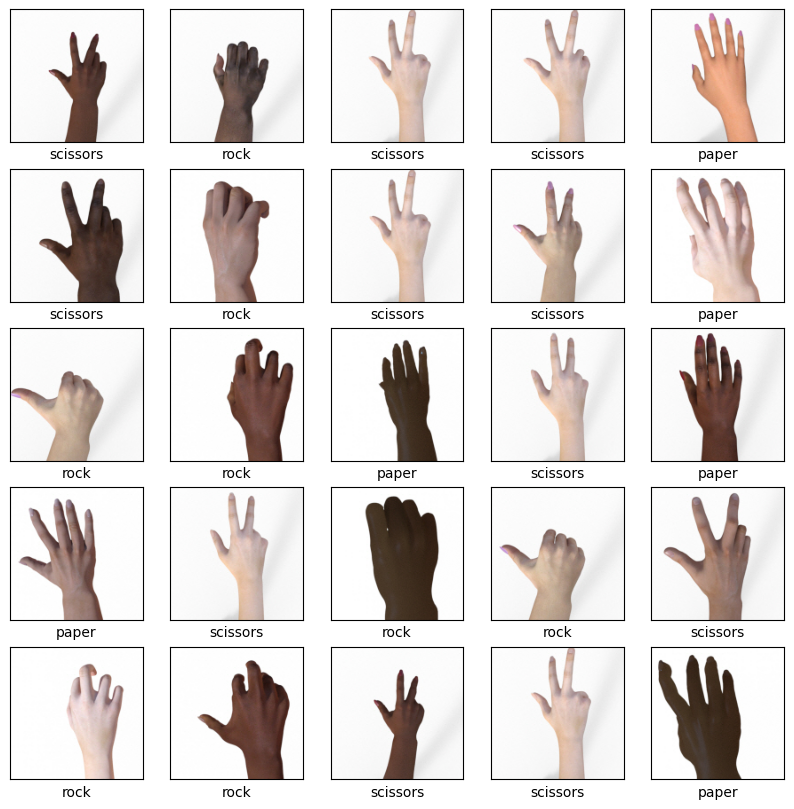



************ TRAINING START ************ 
Epoch 1/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 52s 675ms/step - accuracy: 0.5474 - loss: 0.9087 - val_accuracy: 0.8648 - val_loss: 0.3551
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 81s 667ms/step - accuracy: 0.9450 - loss: 0.1608 - val_accuracy: 0.9983 - val_loss: 0.0275
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 80s 635ms/step - accuracy: 0.9970 - loss: 0.0224 - val_accuracy: 0.9983 - val_loss: 0.0079
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 81s 628ms/step - accuracy: 0.9992 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 84s 652ms/step - accuracy: 1.0000 - loss: 6.7629e-04 - val_accuracy: 0.9983 - val_loss: 0.0033
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 49s 669ms/step - accuracy: 1.0000 - loss: 3.8503e-04 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 82s 666ms/step - accuracy: 1.0000 - loss: 1.8797e-04 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 8/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 81s

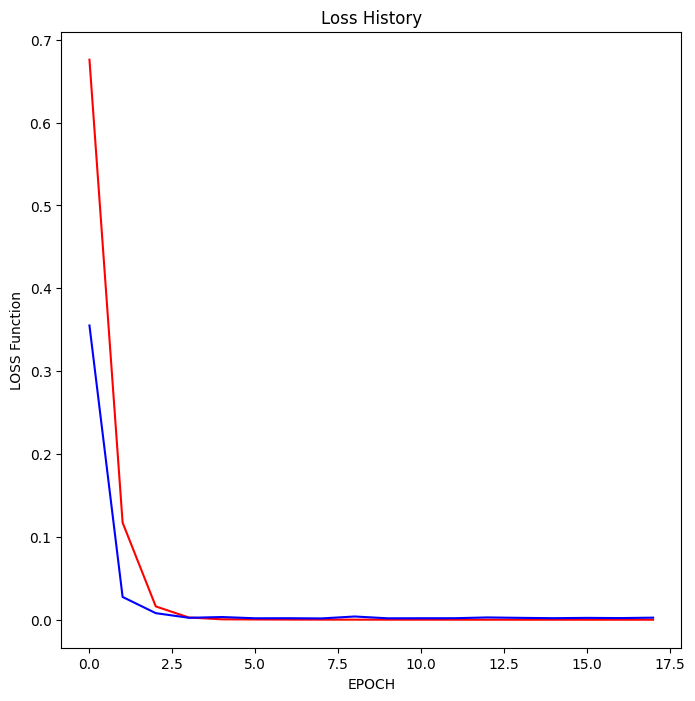

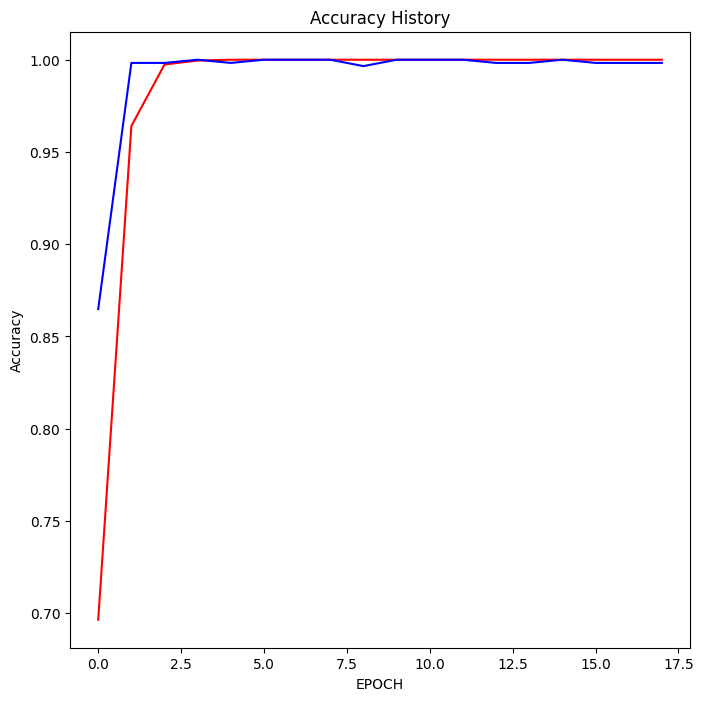

In [5]:

dr = DataReader()
dr.show_processed_images()

model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')  #다중분류

print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=30,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

draw_graph(history)

In [6]:

import tensorflow as tf
# 모델 저장 경로 (JupyterLab의 현재 디렉토리에 저장)
model_save_path = "rps_model.h5"

# 학습이 끝난 모델 저장
model.save(model_save_path)
print(f"✅ 모델이 {model_save_path} 파일로 저장되었습니다!")

✅ 모델이 rps_model.h5 파일로 저장되었습니다!
